<a href="https://colab.research.google.com/github/PMabwa/airbnb-recommender-system/blob/kelvin/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # load the datasets
# # load calendar
# calendar_df = pd.read_csv('/content/calendar.csv.gz', compression='gzip', low_memory=False)
# calendar_df.head()

In [3]:
# load listings
listings_df = pd.read_csv('/content/listings.csv.gz', compression='gzip')
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47


In [4]:
# load reviews
reviews_df = pd.read_csv('/content/reviews.csv.gz', compression='gzip')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [5]:
# Merging dataframes
# Merge listings_df with reviews_df using 'id' from listings_df and 'listing_id' from reviews_df
capetown_airbnb_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
capetown_airbnb_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [6]:
# average out the ratings columns to 1 column 'avg_rating'
# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
capetown_airbnb_df['avg_rating'] = capetown_airbnb_df[rating_columns].mean(axis=1)

In [7]:
# Verify the new column
print(capetown_airbnb_df[['avg_rating']].tail(100))

        avg_rating
560338    4.928571
560339    4.928571
560340    5.000000
560341    5.000000
560342    5.000000
...            ...
560433    5.000000
560434    5.000000
560435    5.000000
560436    5.000000
560437    5.000000

[100 rows x 1 columns]


In [8]:
# print columns in `capetown_airbnb_df`
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [9]:
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_since',
                   'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                   'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'reviewer_id', 'listing_id', 'id_y', 'date', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

capetown_airbnb_df = capetown_airbnb_df.drop(columns=columns_to_drop)

In [10]:
capetown_airbnb_df.columns

Index(['id_x', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'comments', 'avg_rating'],
      dtype='object')

In [11]:
# check for duplicates
capetown_airbnb_df.duplicated().sum()

455

In [12]:
# drop duplicates
capetown_airbnb_df = capetown_airbnb_df.drop_duplicates()

In [13]:
# check for null values
capetown_airbnb_df.isna().sum()

,0
id_x,0
name,0
description,4384
neighborhood_overview,101222
host_id,0
host_response_time,62866
host_response_rate,62866
host_is_superhost,28377
host_listings_count,0
host_total_listings_count,0


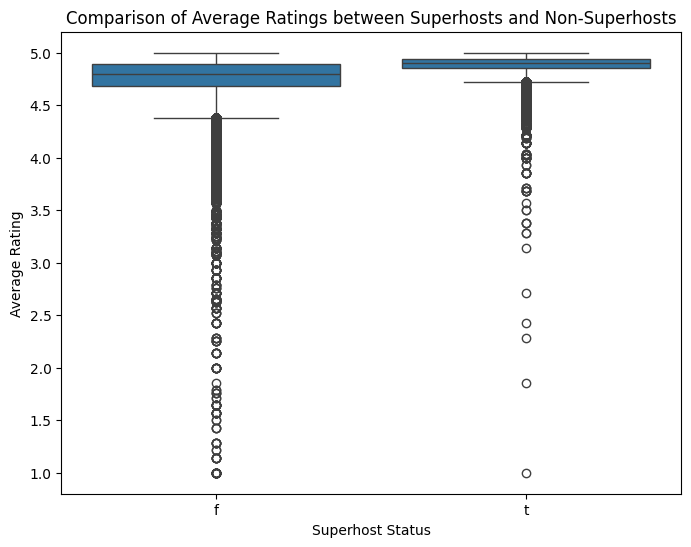

In [17]:
# boxplot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.boxplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df)

# labels and title
plt.title('Comparison of Average Ratings between Superhosts and Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

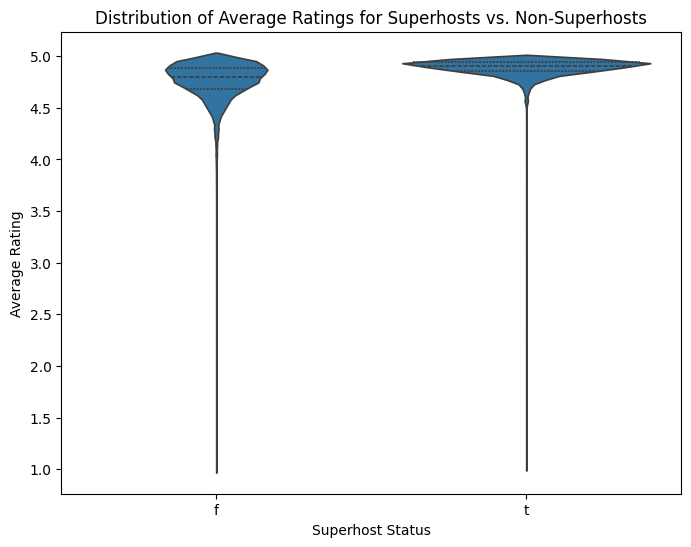

In [18]:
# violin plot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df, inner='quartile')

# labels and title
plt.title('Distribution of Average Ratings for Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

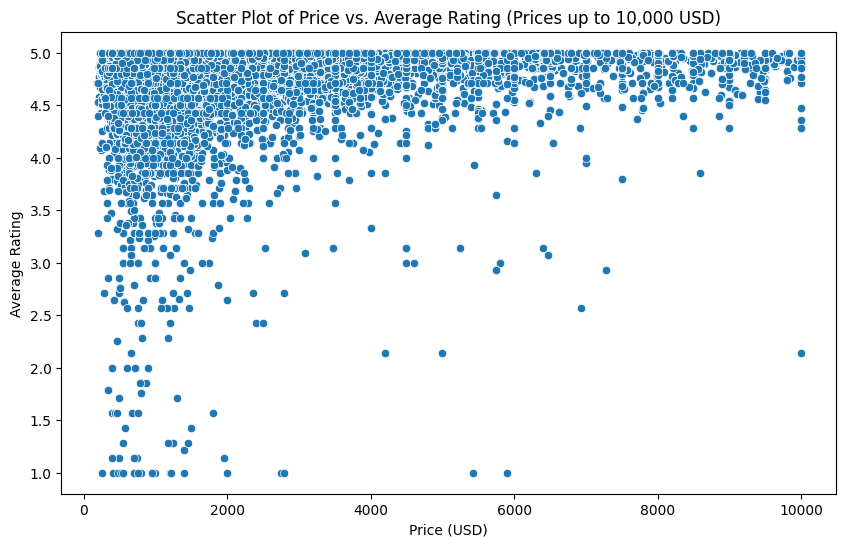

In [21]:
# Create a scatter plot to visualize the relationship between price and avg_rating
# Convert the 'price' column to numeric and remove $ sign
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filter df to include only listings with a price of up to USD 10,000
filtered_df = capetown_airbnb_df[capetown_airbnb_df['price'] <= 10000]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='avg_rating', data=filtered_df)

# labels,title
plt.title('Scatter Plot of Price vs. Average Rating (Prices up to 10,000 USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()

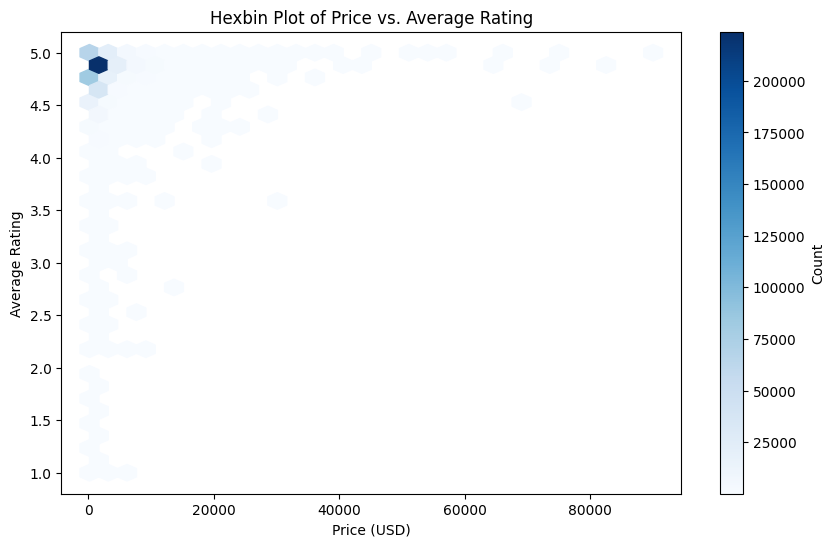

In [20]:
# hexbin plot to visualize the relationship between price and avg_rating
plt.figure(figsize=(10, 6))
plt.hexbin(capetown_airbnb_df['price'], capetown_airbnb_df['avg_rating'], gridsize=30, cmap='Blues', mincnt=1)

# color bar, labels, title
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Price vs. Average Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()